## Final Project Submission

Please fill out:
* Student name: Matthew Daly
* Student pace: part time 
* Scheduled project review date/time: Feb 5
* Instructor name: Eli
* Blog post URL: TBA

In [1]:
# import libraries and tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

## Applying the OSEMN process I am going to explore and model the King's County house sales data set.

### Step one: Obtain

In [2]:
#read in data from csv file, create df_org that is unchanged from original 
df = pd.read_csv('kc_house_data.csv')
df_org = pd.read_csv('kc_house_data.csv')

In [3]:
#check data
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


The data set contains 21597 rows and 21 columns. Information appears to be missing from the yr_renovated, waterfront and view columns.

## Step 2: Scrub the data

### missing data and placeholders

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In looking at this information one glaring outlier/error stands out right away - max bedrooms 33.

In [6]:
# remove obvious error
df = df.drop(df['bedrooms'].idxmax())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       19220 non-null float64
view             21533 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     17754 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


 There appears to be data missing from waterfront, view and yr_renovated. Also, it is odd that sqft_basement is type  
object and not int64 like the other sqft variables. 

In [8]:
# explore NaNs
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Waterfront does have a significant amount of NaNs. Though, in looking at the value_counts, only 0.8 percent of the data set with known waterfront values are waterfront properties. As I do not wish to lose other pertinent data from these rows, I will change the NaNs to 0 (non-waterfront), confident this will not have a negative effect on the data. 



In [9]:
# change waterfront NaNs to 0.0
df['waterfront'] = df['waterfront'].replace(np.nan, 0)


As the number of NaNs for view is minor, I will drop these rows.

In [10]:
df = df[pd.notnull(df['view'])]
df['view'].isna().sum()

0

In the case of yr_renovated things are not as clear. First, the amount of NaN's is significant, being almost 18% of the data. Also, they are dates, not continuous or categorical data, which makes filling in with mean/median or a new category, problematic. The vast majority of the know values in this column are 0 value - 80%.

I am not confident in this data column but want to retain the row data, so I will make a new column 'has_been_renovated' and drop the yr_renovated column.   

In [11]:
#create new column
df['has_been_renovated'] = pd.Series(len(df['yr_renovated']), index=df.index)
df['has_been_renovated'] = 0
df.loc[df['yr_renovated']>0, 'has_been_renovated'] = 1

In [12]:
# drop column 'yr_renovated'
df = df.drop(['yr_renovated'], axis=1)

In the sqft_basement column, '?'s are being used as placeholders. I will replace these with the median of the column - 0. 

In [18]:
# # replace '?' with median of sqft_basement
df['sqft_basement'] = df['sqft_basement'].replace('?', 0)
df['sqft_basement'] = df['sqft_basement'].astype(float)

I am also going to make a new column 'has_basement' as it might become relevant in later modeling.  


In [19]:
#create new column
df['has_basement'] = pd.Series(len(df['sqft_basement']), index=df.index)
df['has_basement'] = 0
df.loc[df['sqft_basement']>0, 'has_basement'] = 1

I am also going to create a has_view column for later modeling. 

In [20]:
# create new column has_view
df['has_view'] = pd.Series(len(df['view']), index=df.index)
df['has_view'] = 0
df.loc[df['view']>0, 'has_view'] = 1

In [21]:
# create new column has_waterfront
df['has_waterfront'] = pd.Series(len(df['view']), index=df.index)
df['has_waterfront'] = 0
df.loc[df['waterfront']>0, 'has_view'] = 1

In [22]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'has_been_renovated', 'has_basement',
       'has_view', 'has_waterfront'],
      dtype='object')

I am also going to make age column.

In [23]:
df['age'] = df['yr_built'].apply( lambda x: 2016 - x)

In [24]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,has_been_renovated,has_basement,has_view,has_waterfront,age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,98178,47.5112,-122.257,1340,5650,0,0,0,0,61
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,98125,47.7210,-122.319,1690,7639,1,1,0,0,65
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,98028,47.7379,-122.233,2720,8062,0,0,0,0,83
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,98136,47.5208,-122.393,1360,5000,0,1,0,0,51
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,98074,47.6168,-122.045,1800,7503,0,0,0,0,29


## Step 3: Explore

#### multicollinearity 

I will look for variables that have a clear relationship with the target variable - price, while also looking to identify variables that have strong relationships with each other. 

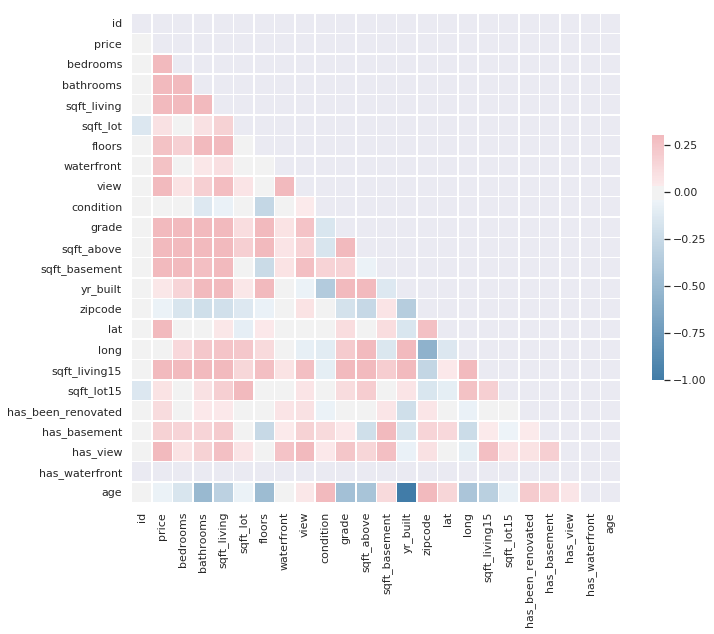

In [25]:
#correlation matrix study
sns.set(style="dark")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

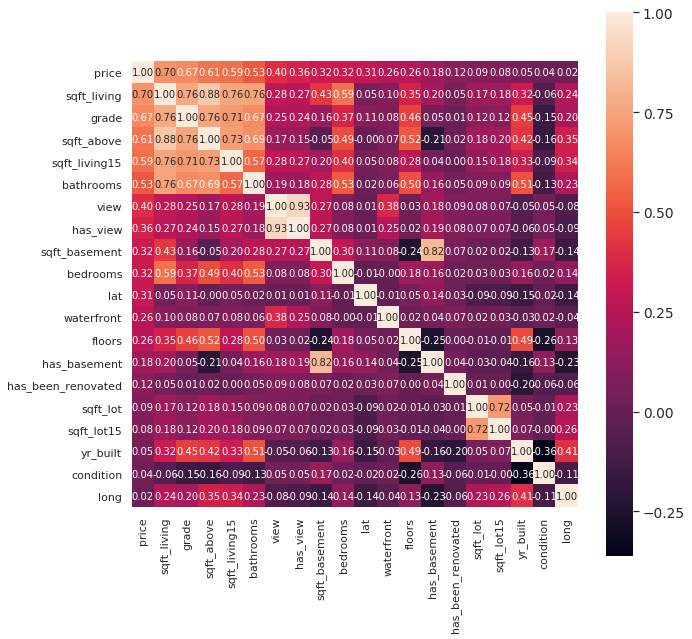

In [26]:
# price correlation matrix
k = 20
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(style="dark")
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
yticklabels=cols.values, xticklabels=cols.values)
plt.show()



I'm setting .75 as my correlation threshold. I have identified sqft_living as my variable with the greatest correlation with price, I see a lot of correlation between sqft_living, sqft_living15, sqft_above, bathrooms, and grade. This makes sense as they are basically dealing with general space (except for grade). Due to this, I am considering excluding them from my model. 



###  Bivariate analysis and removal outliers

For the sake of brevity, I have only included plots that proved themselves pertinent.¶

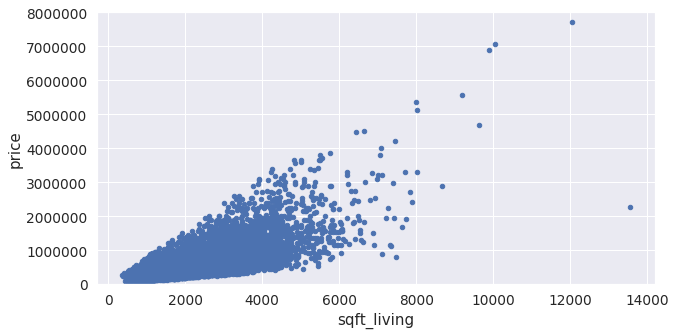

In [27]:
# Bivariate analysis price/sqft_living

var = 'sqft_living'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0, 8000000), figsize=(10, 5))


There is a clear linear relationship between sqft_living and price, making it an ideal candidate for modeling. I am going to remove the one data point at just over 13000 sqft mark. Though other data points break away from the others, they primarily follow the trend, so I will leave them.

In [28]:
df.sort_values(by = 'sqft_living', ascending=False)[:1]
# I am going to remove this one, because it alone doesn't seem to be following the trend
df = df.drop(df[df['id'] == 1225069038].index)

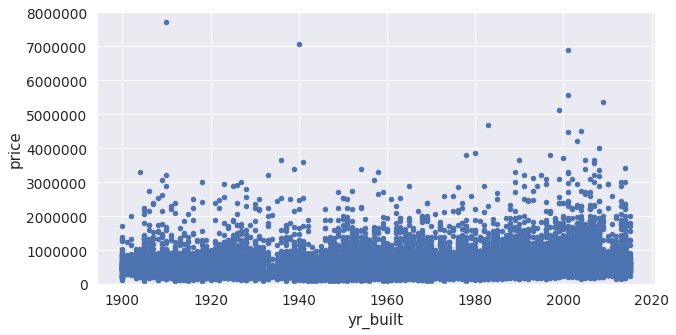

In [29]:
# Bivariate analysis price/yr_built
var = 'yr_built'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0, 8000000), figsize=(10, 5))


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 <a list of 116 Text xticklabel objects>)

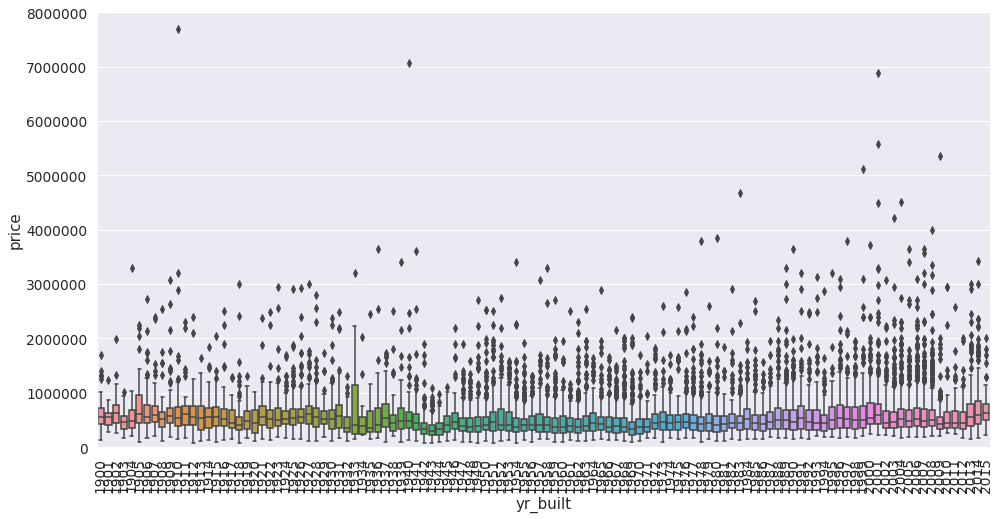

In [30]:
# interesting, I would also like to see this as a box plot
var = 'yr_built'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y='price', data=data)
fig.axis(ymin=0, ymax=8000000);
plt.xticks(rotation=90)

There is a lot of movement in this plot, making me believe that yr_built has an interesting effect on price, both positively and negatively. 

(-0.5, 10.5, 0, 8000000)

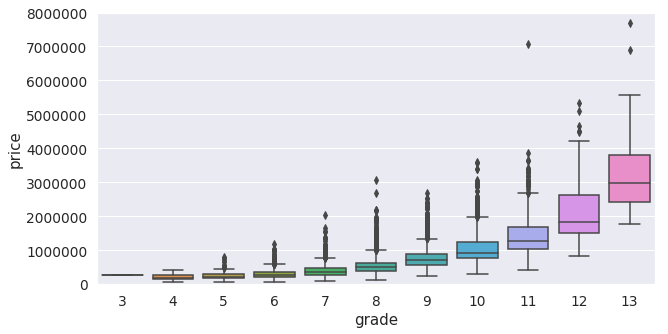

In [31]:
# Bivariate analysis price/grade
var = 'grade'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10,5))
fig = sns.boxplot(x=var, y='price', data=data)
fig.axis(ymin=0, ymax=8000000)


Fairly clear exponential relationship between grade and price. 

In [32]:
# At this point I do want to drop some of the higher price properties as they may act as outliers to my model. 
df.sort_values(by = 'price', ascending=False)[:2]
df = df.drop(df[df['id'] == 6762700020].index)
df = df.drop(df[df['id'] == 9808700762].index)

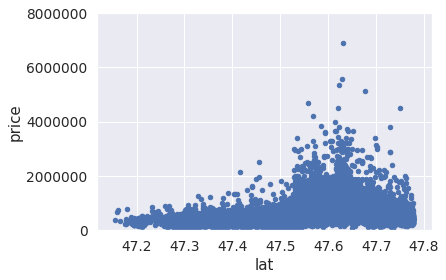

In [33]:
# Bivariate analysis price/grade
var = 'lat'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0, 8000000))

Though not linear(which makes sense given the nature of latitudinal information) there is an interesting jump in price that happens right around the 47.5 mark.

After looking at the data, I have isolated a few data points that will be useful in modeling, though I will want to look at these relationships again after normalizing and scaling the data. 

### Normalize Data


Let's take a look at the distributions of the various variables. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8457fe8048>,
      dtype=object)

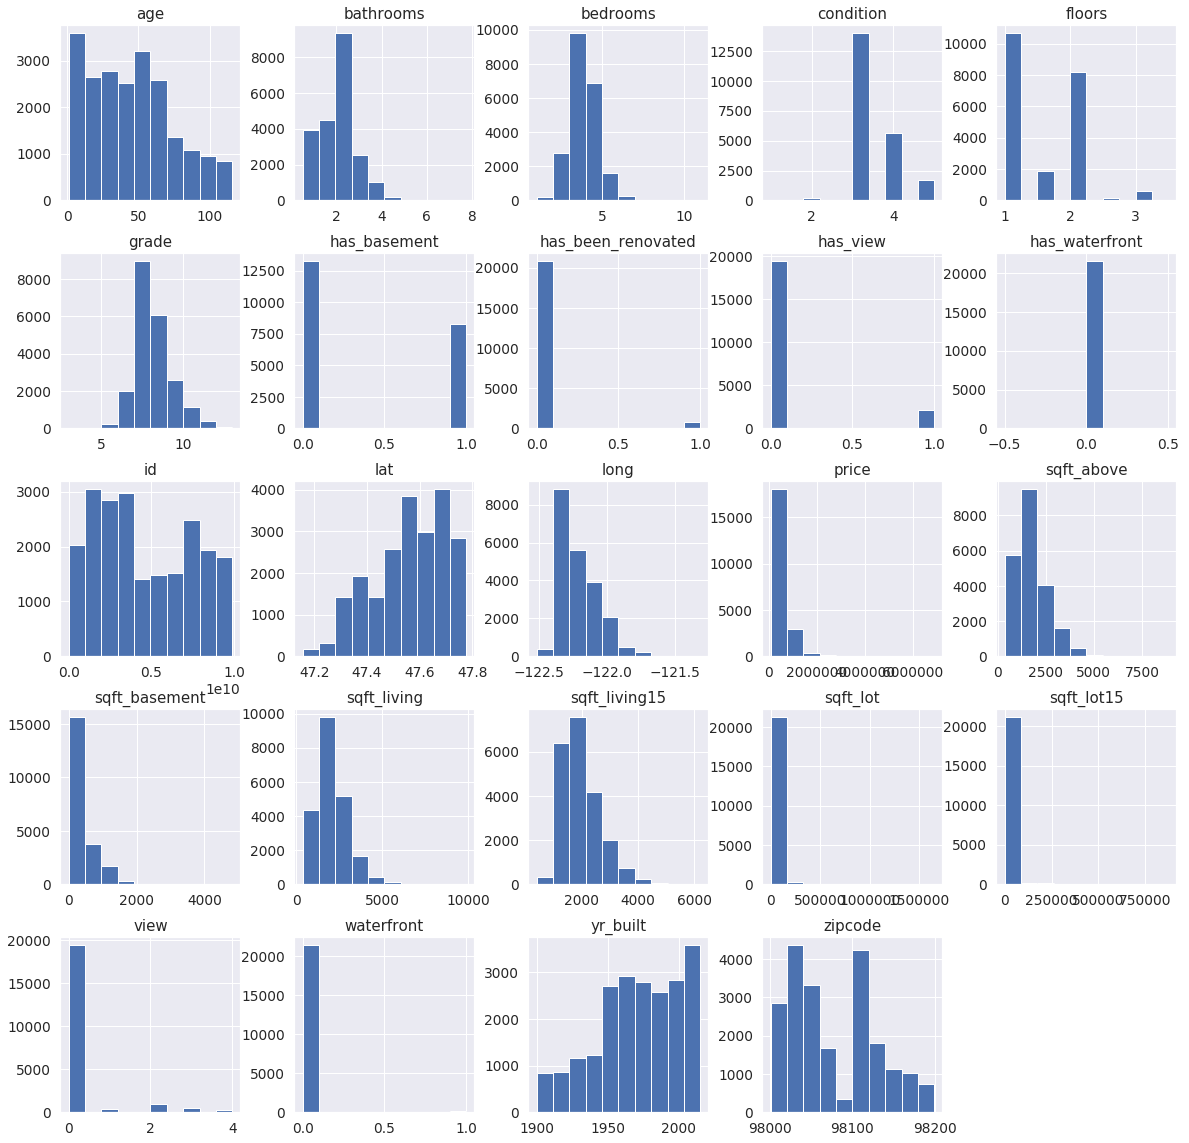

In [34]:
df.hist(figsize = [20, 20])

In [35]:
# sqft_basement is giving -inf values due to 0 values, after splitting the df to look at total sqft of basement
# on price and seeing no significant correlation, I am dropping this column as being problematic.
df = df.drop(['sqft_basement'], axis=1)

I'll first look at my target variable - price.

In [36]:
#descriptive statistics summary
df['price'].describe()

count    2.153000e+04
mean     5.393368e+05
std      3.598989e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      6.890000e+06
Name: price, dtype: float64

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.]),
 <a list of 10 Text xticklabel objects>)

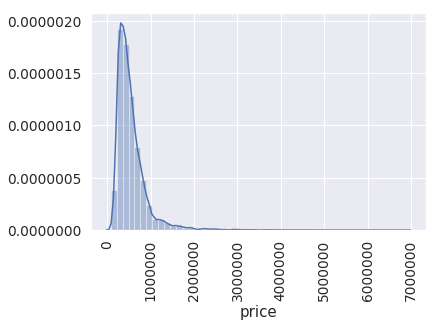

In [32]:
#histogram
sns.distplot(df['price'])
plt.xticks(rotation=90)

In [37]:
#skewness and kurtosis
print('Skewness = %f' % df['price'].skew())
print('Kurtosis = %f' % df['price'].kurt())

Skewness = 3.541597
Kurtosis = 24.178142


Obvious positive skewness and kurtosis

I've done a similar analysis of all of the variables I think are relevant. I will normalize the continuous data. 

In [38]:
df_continuous_data = ['price', 'sqft_living', 'sqft_lot','sqft_lot15', 'long', 'grade', 'bedrooms', 'bathrooms', 'yr_built', 'lat', 'sqft_living15', 'sqft_above', 'zipcode', 'long', 'age', 'condition', 'waterfront', 'floors']

for col in df_continuous_data:
    df[col] = np.log(df[col])

Recheck for normality - for brevity, only including relevant plots. 

In [39]:
from sklearn import preprocessing
x = df[['price']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
df['price'] = min_max_scaler.fit_transform(x)

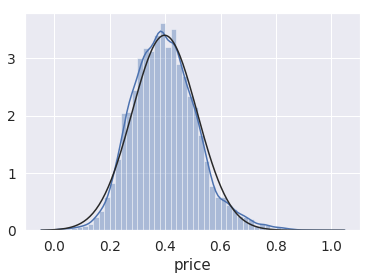

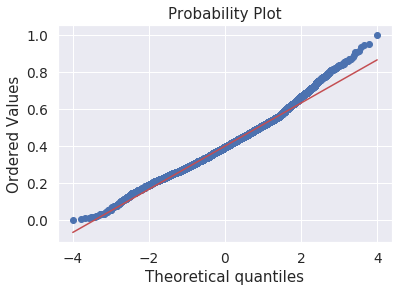

In [40]:
# transformed hist and prob plot price
sns.distplot(df['price'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

In [41]:
from sklearn import preprocessing
x = df[['sqft_living']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
df['sqft_living'] = min_max_scaler.fit_transform(x)

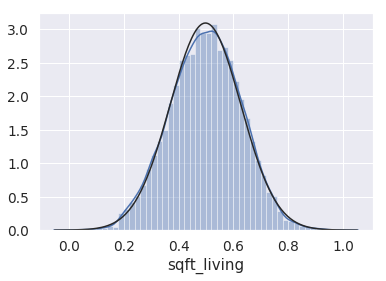

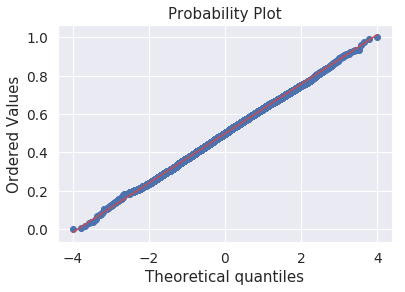

In [42]:
# check sqrt_living
sns.distplot(df['sqft_living'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['sqft_living'], plot=plt)

In [43]:
from sklearn import preprocessing
x = df[['grade']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
df['grade'] = min_max_scaler.fit_transform(x)

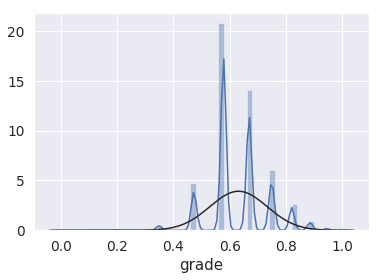

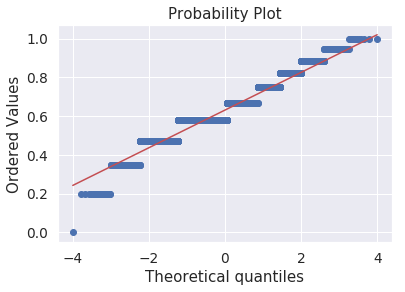

In [44]:
# check with sqrt_living
sns.distplot(df['grade'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['grade'], plot=plt)

I will rerun the correlation matrix to see if the long transformation and removal of outliers has changed things.

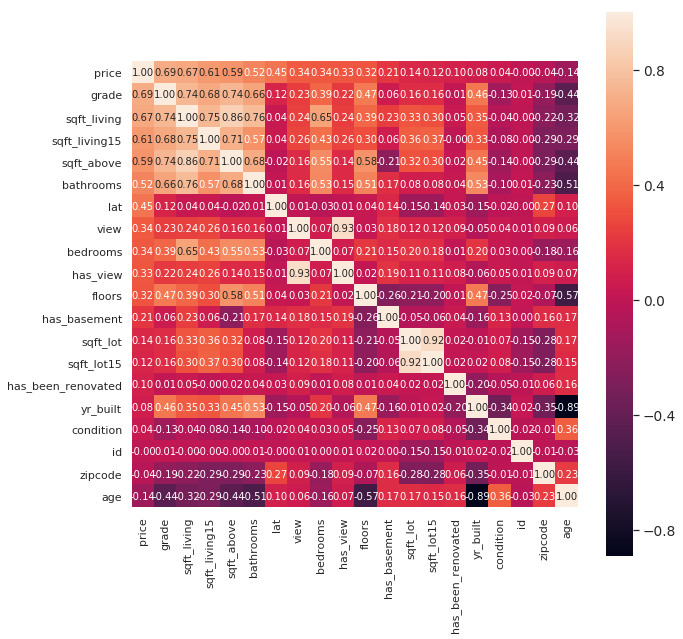

In [45]:
# rerun correlation matrix 
corr = df.corr()
k = 25
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(style="dark")
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
yticklabels=cols.values, xticklabels=cols.values)
plt.show()

After normalization sqft_living's correlation with grade has dropped below the .75 correlation threshold I'd set. So I will be able to include both of them in my model. 

## Model

Create dummy variables for categorical data.

In [46]:
df = df.drop(['date', 'long', 'waterfront'], axis=1)
yr_dummies = pd.get_dummies(df['yr_built'], prefix='yr')
grade_dummies = pd.get_dummies(df['grade'], prefix='gr')
floor_dummies = pd.get_dummies(df['floors'], prefix='floor')
view_dummies = pd.get_dummies(df['view'], prefix='view')
basement_dummies = pd.get_dummies(df['has_basement'], prefix='basement')
waterfront_dummies = pd.get_dummies(df['has_waterfront'], prefix='waterfront')
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix='zipcode')
bedroom_dummies = pd.get_dummies(df['bedrooms'], prefix='bedrooms')
condition_dummies = pd.get_dummies(df['condition'], prefix='condition')

In [47]:
df = df.drop(['yr_built', 'grade', 'floors', 'view', 'has_waterfront', 'has_basement', 'zipcode', 'bedrooms', 'condition'], axis=1)

In [48]:
df = pd.concat([df, grade_dummies, yr_dummies, floor_dummies, view_dummies, zipcode_dummies, waterfront_dummies, basement_dummies, bedroom_dummies, condition_dummies], axis=1)

In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

After many iterations of features, I have decided on sqft_living, grade, yr_built, lat, and zip code. This combination gives me the highest R-squared(.855) with the minimal amount of predictors and acceptable collinearity between those predictors. As I want my model to be robust, I feel it is best to limit variables to as few as possible.

All properties have sqft_living, grade, yr_built, lat, and zip code. While including other predictors in the model did result in a slight increase in the R-squared, I feel their exclusion, in the end, makes a stronger model.


In [50]:
model = 'price ~  sqft_living + grade_dummies + yr_dummies + lat + zipcode_dummies'
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     643.0
Date:                Mon, 04 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:16:43   Log-Likelihood:                 36397.
No. Observations:               21530   AIC:                        -7.240e+04
Df Residuals:                   21333   BIC:                        -7.083e+04
Df Model:                         196                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -14.2474      2.924     -4.872      0.000     -19.979      -8.515
sqft_living             0.3792      0.004    101.174      0.000       0.372       0.387
grade_dummies[0]       -1.2651      0.269     -4.703      0.000      -1.792      -0.738
grade_dummies[1]       -1.3954      0.266     -5.248      0.000      -1.917      -0.874
grade_dummies[2]       -1.4017      0.266     -5.271      0.000      -1.923      -0.880
grade_dummies[3]       -1.3844      0.266     -5.207      0.000      -1.906      -0.863
grade_dummies[4]       -1.3616      0.266     -5.121      0.000      -1.883      -0.840
grade_dummies[5]       -1.3343      0.266     -5.018      0.000      -1.855      -0.813
grade_dummies[6]       -1.2988      0.266     -4.884      0.000      -1.820      -0.778
grade_dummies[7]       -1.2671      0.266     -4.765      0.000      -1.788      -0.746
grade_dummies[8]       -1.2281      0.266     -4.617      0.000      -1.749      -0.707
grade_dummies[9]       -1.1767      0.266     -4.425      0.000      -1.698      -0.655
grade_dummies[10]      -1.1342      0.266     -4.262      0.000      -1.656      -0.613
yr_dummies[0]          -0.1045      0.026     -4.083      0.000      -0.155      -0.054
yr_dummies[1]          -0.1304      0.026     -4.922      0.000      -0.182      -0.078
yr_dummies[2]          -0.1193      0.027     -4.485      0.000      -0.172      -0.067
yr_dummies[3]          -0.1220      0.026     -4.686      0.000      -0.173      -0.071
yr_dummies[4]          -0.1023      0.026     -3.914      0.000      -0.154      -0.051
yr_dummies[5]          -0.0972      0.026     -3.776      0.000      -0.148      -0.047
yr_dummies[6]          -0.1059      0.026     -4.130      0.000      -0.156      -0.056
yr_dummies[7]          -0.0986      0.026     -3.813      0.000      -0.149      -0.048
yr_dummies[8]          -0.1154      0.026     -4.501      0.000      -0.166      -0.065
yr_dummies[9]          -0.1018      0.026     -3.978      0.000      -0.152      -0.052
yr_dummies[10]         -0.1068      0.026     -4.184      0.000      -0.157      -0.057
yr_dummies[11]         -0.1048      0.026     -4.067      0.000      -0.155      -0.054
yr_dummies[12]         -0.1106      0.026     -4.300      0.000      -0.161      -0.060
yr_dummies[13]         -0.1102      0.026     -4.252      0.000      -0.161      -0.059
yr_dummies[14]         -0.1158      0.026     -4.460      0.000      -0.167      -0.065
yr_dummies[15]         -0.1027      0.026     -3.972      0.000      -0.153      -0.052
yr_dummies[16]         -0.1006      0.026     -3.917      0.000      -0.151      -0.050
yr_dummies[17]         -0.1046      0.026     -4.037      0.000      -0.155      -0.054
yr_dummies[18]         -0.1132      0.026     -4.428      0.000      -0.163      -0.063
yr_

With these features, I end up with an R-squared of 0.855, with these five predictors accounting for 86% of the price of a house within this data set. 

## Model Validation

I will test my model using 30/70 testing-training split, and follow that up with cross-validation.

In [51]:
y = df[['price']]
X = df.drop(['price'], axis=1)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [54]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16147 5383 16147 5383


In [55]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [56]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [58]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.001522381084849954
Test Mean Squarred Error: 0.0017007068491386923


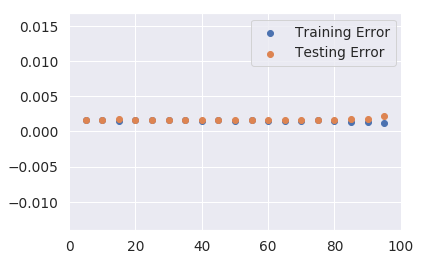

In [61]:
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

Cross Validation

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")
cv_20_results = cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error")

In [63]:
cv_5_results.mean()

-0.001610614385459598

In [64]:
cv_10_results.mean()

-0.0016071416681324388

In [65]:
cv_20_results.mean()

-0.0016028046158212367

After testing I am confident in my model. 

## Step 5: Interpret 

In exploring and analyzing this data set from the perspective of potential investment opportunities, I see its greatest use in identifying undervalued properties and areas. While the set contains 21 data points, five prove themselves most useful in predicting the price of a property. Using those five points, current properties on the market could be compared to the model and if their price fell below the predicted price would be worthy of further investigation. In this way, large collections of listings could be quickly searched for hidden value. 

Of course, I must emphasize this would be used as a first step,  further research on individual properties would be needed to see if they are indeed good candidates for investment. 

Following along those lines, I also see potential in properties that could be increased in grade.  There is a significant price jump from one grade to another. 

The median price for a grade 6 house (the lowest grade still up to code) 
is 275, 276. The median for a  grade 7 house is 375,000. That is an increase of 99, 724. Grade 7 to 8 the median increase is 135,000. 8 to 9, 210, 000, and so on. This may point to an opportunity to buy a home and through renovations increase its overall grade and therefore its potential value. Again further research would be needed to find out what steps would be needed, and the overall cost-effectiveness, of changing a house's grade.

The data also points to potential in both the latitudinal placement of a property and its zip code.  While both show potential, I was intrigued by the sudden and clear increase in price seen when the latitude of a house is above ~ 47.5 and below ~ 47.7. Houses above this latitude had a median price of 560, 000, while houses below it, a median price of 300,000. Give the nature of urban grown, there may be a potential to buy properties just outside of this zone expecting the area of higher prices would eventually spread over time. Again, further research would be necessary.

## Future Work

My analysis of this data set was by no means exhaustive. While I did identify a few areas of interest, more time would be needed to fully evaluate their potential. 

If given that time I would look for hidden areas of unrealized value by examining in much more detail the location of homes using latitude and longitude, as well as a full exploration of the zip code data - which due to time constraints I barely touched upon. There could be areas adjacent to higher priced zip codes that will soon see an increase in home price due to proximity.

It would also be beneficial to further research the viability of 'grade jumping' homes. Besides individual homes, there may be areas or neighborhoods ripe for renovation. 

In short, I feel that there is a lot of value within this data set, but it would take a much more detailed analysis to fully realize it. 